In [1]:
from utils import ModelImporter, Preprocessing
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pre = Preprocessing('fer2013')
train = pre.load_data(filename='DatasetAAA.csv.gz', name='train')

#### I have a very little amount of samples of class 1:Disgust,  I am going to increase that number by rotating and flipping horizontal

In [3]:
disgust = train.loc[train['emotion'] == 1]
disgust.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
299,0.072682,0.111679,0.188440,0.109479,0.009431,0.806314,0.918836,0.913721,0.935763,0.941302,...,0.278435,-0.054155,-0.341554,-0.450808,-0.529405,-0.675712,-0.074243,1.093875,1.187717,1
388,-0.376043,-0.764840,-1.128628,-0.913922,-0.866859,-0.799514,-0.736829,-0.720456,-0.685124,-0.975994,...,-0.156266,0.001144,0.161743,-0.143023,-0.569086,-1.002380,-1.158057,-1.158461,-1.224517,1
416,1.018644,0.963507,0.840702,0.250196,-0.775306,-0.772750,-0.682096,-0.706489,-0.585595,-0.154296,...,0.110164,0.056442,0.012114,0.124617,0.370031,0.408824,0.480566,0.543589,0.591006,1
473,-1.285622,-1.308035,-1.266606,-1.272112,-0.893017,-0.170564,0.084162,0.075681,0.054228,0.191682,...,-0.562923,-0.800681,-1.076096,-1.173435,-1.005577,-0.871713,-0.874201,-0.864121,-0.843638,1
533,-1.237111,-1.135201,-0.815040,-0.466184,-0.265227,-0.143801,-0.093719,-0.091927,-0.087955,-0.082217,...,0.755205,0.761494,0.773861,0.766952,0.753614,0.670158,0.583787,-0.377822,-1.275301,1


In [4]:
len(disgust)

436

In [5]:
from image_utils import ImageConverter
import matplotlib.pyplot as plt

In [6]:
img_conv = ImageConverter()

In [7]:
train_only_disgust_np = disgust.drop(columns = ['emotion']).values

In [8]:
array_0 = train_only_disgust_np[0]
array_0_frame = img_conv.reshape_array_to_frame(array_0)
array_0_frame_flipped = img_conv.rotate_image(array_0_frame, 20)

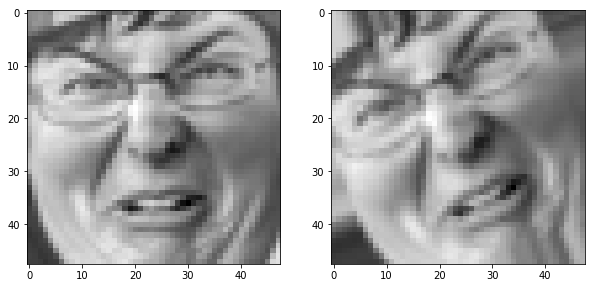

In [9]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(array_0_frame, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(array_0_frame_flipped, cmap='gray', interpolation='none')
plt.show()

In [10]:
array_50 = train_only_disgust_np[50]
array_50_frame = img_conv.reshape_array_to_frame(array_50)
array_50_frame_flipped = img_conv.rotate_image(array_50_frame, 20)

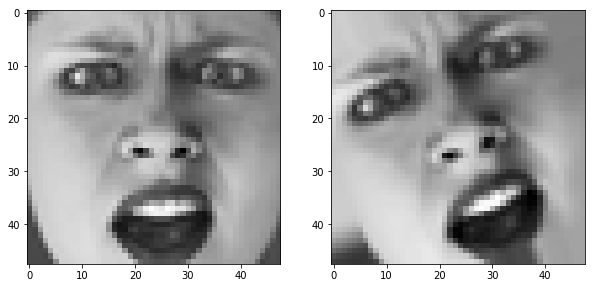

In [11]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(array_50_frame, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(array_50_frame_flipped, cmap='gray', interpolation='none')
plt.show()

In [12]:
rotated_10_train_only_disgust = np.zeros(shape=train_only_disgust_np.shape)
rotated_20_train_only_disgust = np.zeros(shape=train_only_disgust_np.shape)
idx = 0
for i in range(len(train_only_disgust_np)):
    array = train_only_disgust_np[i]
    frame = img_conv.reshape_array_to_frame(array)
    
    rot_10 = img_conv.rotate_image(frame, 10)
    array_rot_10 = img_conv.reshape_frame_to_array(rot_10)
    rotated_10_train_only_disgust[i] = array_rot_10  
    
    rot_20 = img_conv.rotate_image(frame, 20)
    array_rot_20 = img_conv.reshape_frame_to_array(rot_20)
    rotated_20_train_only_disgust[i] = array_rot_20
    
    ##rot_15 = img_conv.rotate_image(img_conv.reshape_array_to_frame(train_only_disgust_np[i]), 15)
    #rotated_train_only_disgust[i] = img_conv.reshape_frame_to_array(rot_5)
    #rotated_train_only_disgust[idx + 1] = img_conv.reshape_frame_to_array(rot_15)

In [13]:
len(rotated_10_train_only_disgust)

436

In [14]:
len(rotated_20_train_only_disgust)

436

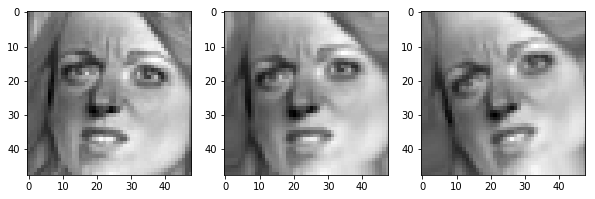

In [15]:
img_idx = 170
plt.figure(1, figsize=(10, 5))
plt.subplot(1,3, 1)
plt.imshow(img_conv.reshape_array_to_frame(train_only_disgust_np[img_idx]), cmap='gray', interpolation='none')
plt.subplot(1,3, 2)
plt.imshow(img_conv.reshape_array_to_frame(rotated_10_train_only_disgust[img_idx]), cmap='gray', interpolation='none')
plt.subplot(1,3, 3)
plt.imshow(img_conv.reshape_array_to_frame(rotated_20_train_only_disgust[img_idx]), cmap='gray', interpolation='none')
plt.show()

In [16]:
#Seems to work, going to save the data

In [17]:
rot_disgust_10_df = pd.DataFrame(rotated_10_train_only_disgust)
rot_disgust_10_df['emotion'] = 1
rot_disgust_10_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
431,-0.993083,-0.953576,-0.912912,-0.458759,0.423167,1.277226,1.644133,1.734048,1.728515,1.713062,...,-1.087346,-1.137430,-1.182160,-1.212352,-1.274939,-1.293308,-1.241542,-1.084978,-1.041691,1
432,-0.364631,-0.362055,-0.374638,-0.397320,-0.430745,-0.463620,-0.478119,-0.490729,-0.502413,-0.506982,...,0.053891,0.039317,-0.071474,-0.155699,-0.156067,-0.007857,0.065584,0.048086,0.011769,1
433,1.302557,1.516351,1.583090,1.685676,1.743617,1.766334,1.753959,1.683693,1.600510,1.535659,...,1.264152,1.255733,1.064086,0.808108,0.036170,-1.051171,-1.474320,-1.464660,-1.474078,1
434,-0.874180,-0.760116,-0.696906,-0.681223,-0.659052,-0.590080,-0.505777,-0.396174,-0.348534,-0.396013,...,-0.897944,-0.869497,-0.841074,-0.807669,-0.781032,-0.764917,-0.761599,-0.760625,-0.756158,1
435,0.287703,-0.134694,-0.456527,-0.308740,0.422797,1.117299,1.337003,1.404287,1.348297,1.300559,...,1.362073,1.285656,1.217691,1.104541,0.892289,0.570821,0.200374,-0.064824,-0.224854,1


In [18]:
rot_disgust_20_df = pd.DataFrame(rotated_20_train_only_disgust)
rot_disgust_20_df['emotion'] = 1
rot_disgust_20_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
431,1.325168,1.652732,1.734048,1.728997,1.714517,1.699515,1.675425,1.591326,1.555430,1.551096,...,-0.710129,-0.913766,-0.993138,-1.025566,-1.057214,-1.088372,-1.137430,-1.179887,-1.209698,1
432,-0.465268,-0.478757,-0.490729,-0.502373,-0.505878,-0.514298,-0.508173,-0.489293,-0.476356,-0.497212,...,-0.187602,-0.061887,-0.043311,-0.095673,-0.036257,0.057105,0.039317,-0.063253,-0.149847,1
433,1.767167,1.750698,1.683693,1.601949,1.545613,1.443239,1.333895,1.288566,1.223106,1.189541,...,1.474798,1.472724,1.418044,1.242165,1.190794,1.267739,1.255733,1.080129,0.833270,1
434,-0.583700,-0.498182,-0.396174,-0.347597,-0.387950,-0.468427,-0.546727,-0.614280,-0.729637,-0.796614,...,-1.049904,-1.050768,-1.005348,-0.959457,-0.931716,-0.896665,-0.869497,-0.843000,-0.811091,1
435,1.143279,1.345459,1.404287,1.349791,1.305015,1.262459,1.232903,1.232464,1.294605,1.265457,...,1.442826,1.471692,1.475973,1.476921,1.441706,1.358903,1.285656,1.221933,1.118014,1


In [19]:
rot_disgust_df = pd.concat([rot_disgust_10_df, rot_disgust_20_df])

In [20]:
rot_disgust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 435
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 15.3 MB


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 504.9 MB


In [22]:
#the rotated dataset and the train seems to match

In [23]:
rot_disgust_df.columns = train.columns 

In [24]:
train_expanded_disgust_rot = pd.concat([train, rot_disgust_df], axis = 0)

In [25]:
train_expanded_disgust_rot = train_expanded_disgust_rot.reset_index().drop(columns = ['index'])

In [26]:
train_expanded_disgust_rot.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
29576,1.325168,1.652732,1.734048,1.728997,1.714517,1.699515,1.675425,1.591326,1.555430,1.551096,...,-0.710129,-0.913766,-0.993138,-1.025566,-1.057214,-1.088372,-1.137430,-1.179887,-1.209698,1
29577,-0.465268,-0.478757,-0.490729,-0.502373,-0.505878,-0.514298,-0.508173,-0.489293,-0.476356,-0.497212,...,-0.187602,-0.061887,-0.043311,-0.095673,-0.036257,0.057105,0.039317,-0.063253,-0.149847,1
29578,1.767167,1.750698,1.683693,1.601949,1.545613,1.443239,1.333895,1.288566,1.223106,1.189541,...,1.474798,1.472724,1.418044,1.242165,1.190794,1.267739,1.255733,1.080129,0.833270,1
29579,-0.583700,-0.498182,-0.396174,-0.347597,-0.387950,-0.468427,-0.546727,-0.614280,-0.729637,-0.796614,...,-1.049904,-1.050768,-1.005348,-0.959457,-0.931716,-0.896665,-0.869497,-0.843000,-0.811091,1
29580,1.143279,1.345459,1.404287,1.349791,1.305015,1.262459,1.232903,1.232464,1.294605,1.265457,...,1.442826,1.471692,1.475973,1.476921,1.441706,1.358903,1.285656,1.221933,1.118014,1


In [27]:
# I have now the data with rotated disgust images, my next step is to flip ALL OF IT

In [28]:
train_np = train_expanded_disgust_rot.drop(columns = ['emotion']).values

In [29]:
flipped_train_np = np.zeros(shape=train_np.shape)
for i in range(len(train_np)):
    flipped_np = img_conv.flip_frame_horitzontally(img_conv.reshape_array_to_frame(train_np[i]))
    flipped_train_np[i] = img_conv.reshape_frame_to_array(flipped_np)

In [30]:
flipped_train_np

array([[-0.94871455, -0.90103049, -0.76584152, ..., -0.39951593,
        -0.56421664, -0.51135155],
       [ 0.01435704,  0.29842735,  0.20136557, ...,  0.88745717,
         0.8548128 ,  0.86072528],
       [-1.25348404, -1.0988792 , -0.86633057, ...,  1.71570718,
         1.70369649,  1.66634838],
       ...,
       [ 0.33003196,  0.48236993,  0.51395664, ..., -1.47179619,
        -1.47467521, -1.48061106],
       [-1.27962384, -1.26600753, -1.24943582, ..., -0.05406153,
         0.07727114,  0.06328149],
       [ 0.05971013,  0.04541673,  0.03920234, ...,  1.70067913,
         1.69976803,  1.699323  ]])

In [31]:
new_train = pd.DataFrame(flipped_train_np)
new_train['emotion'] = train_expanded_disgust_rot['emotion']
new_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
29576,-0.203743,-0.090326,-0.022239,0.019947,0.062132,0.043866,0.002929,-0.038007,-0.000856,0.182147,...,0.619192,0.731339,0.890033,1.048728,1.168525,1.184597,1.200669,1.210669,1.210043,1
29577,0.275378,0.243262,0.191481,0.128464,0.065446,0.012206,-0.037367,-0.086941,0.376351,0.581175,...,0.695242,0.661575,0.574571,0.487567,0.436907,0.483162,0.529417,0.574228,0.616510,1
29578,0.330032,0.482370,0.513957,0.476543,0.439129,0.423966,0.417148,0.410329,0.142462,-0.823467,...,-1.489551,-1.491536,-1.483354,-1.475173,-1.469532,-1.470664,-1.471796,-1.474675,-1.480611,1
29579,-1.279624,-1.266008,-1.249436,-1.231175,-1.212915,-1.210870,-1.214906,-1.218942,-1.193184,-1.185663,...,-0.078488,-0.516130,-0.525350,-0.534570,-0.482810,-0.268436,-0.054062,0.077271,0.063281,1
29580,0.059710,0.045417,0.039202,0.037605,0.036007,0.075290,0.129903,0.184516,0.120240,0.168377,...,1.736537,1.705972,1.705012,1.704053,1.703034,1.701857,1.700679,1.699768,1.699323,1


In [32]:
new_train.columns = train_expanded_disgust_rot.columns 

In [33]:
train_expanded = pd.concat([train_expanded_disgust_rot, new_train], axis = 0)

In [34]:
train_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59162 entries, 0 to 29580
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 1.0 GB


In [35]:
pre.set(name='DatasetDDD', value=train_expanded)

In [36]:
#Chack the structure of the new training dataset

In [37]:
X_df = train_expanded.drop(columns=['emotion'])
y_df = train_expanded['emotion']

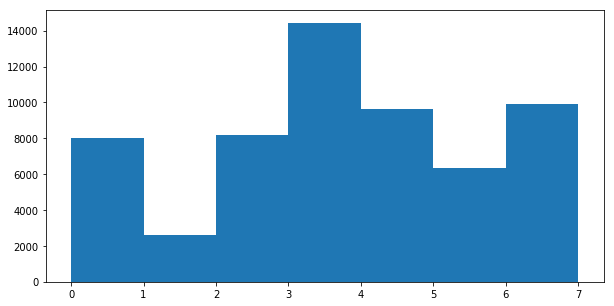

In [38]:
plt.figure(1, figsize=(10, 5))
plt.hist(y_df.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.show()

In [39]:
pre.save(name= 'DatasetDDD')


In [40]:
print('datasetDDD saved')

datasetDDD saved


In [16]:
#compare the new with the old one

In [46]:
pre.load_data(filename='train_norm.csv', name='train_norm')

X_df_old = pre.get(name='train_norm').drop(columns=['emotion'])
y_df_old= pre.get(name='train_norm')['emotion']

In [49]:
pre.load_data(filename='train_expanded_disgust.csv', name='train_expanded_disgust')

X_df_exp_c1 = pre.get(name='train_expanded_disgust').drop(columns=['emotion'])
y_df_exp_c1 = pre.get(name='train_expanded_disgust')['emotion']

In [48]:
pre.load_data(filename='train_expanded.csv', name='train_expanded')

X_df_exp = pre.get(name='train_expanded').drop(columns=['emotion'])
y_df_exp = pre.get(name='train_expanded')['emotion']

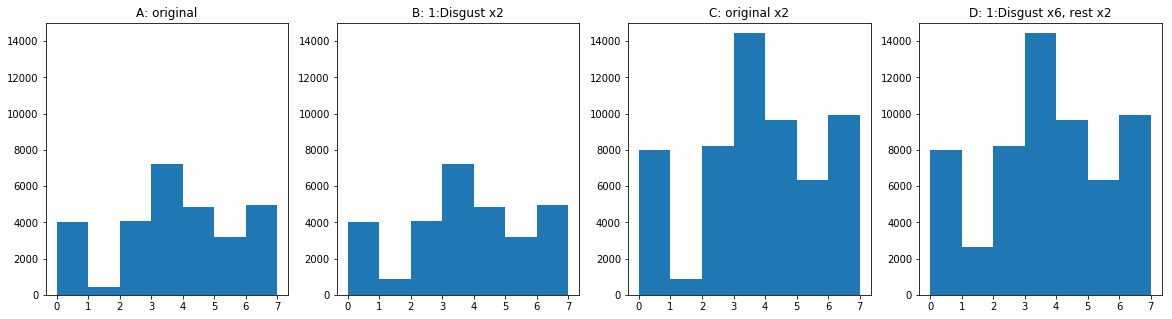

In [69]:
plt.figure(1, figsize=(20, 5))
plt.subplot(1,4, 1)
plt.hist(y_df_old.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('A: original')
plt.subplot(1,4, 2)
plt.hist(y_df_exp_c1.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('B: 1:Disgust x2')
plt.subplot(1,4, 3)
plt.hist(y_df_exp.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('C: original x2')
plt.subplot(1,4, 4)
plt.hist(y_df.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('D: 1:Disgust x6, rest x2')
plt.show()